In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn import svm

import matplotlib.pyplot as plt
from six import StringIO
from IPython.display import Image
!conda install pydotplus -y
import pydotplus
from sklearn.tree import export_graphviz


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from datetime import datetime
import time
import random
plt.style.use('ggplot')

Solving environment: ...working... done

# All requested packages already installed.



In [16]:
df=pd.read_csv('dataset/Boston.csv')

In [17]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,NaN,NaN
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,NaN,NaN
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,NaN,NaN
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,NaN,NaN


In [25]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,NaN,NaN


In [26]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,NaN,NaN
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,NaN,NaN
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,NaN,NaN
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,NaN,NaN
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9,0,NaN,NaN


In [27]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [28]:
df.shape

(506, 17)

In [29]:
df.size

8602

In [30]:
df.nunique()

CRIM           504
ZN              26
INDUS           76
CHAS             2
NOX             81
RM             446
AGE            356
DIS            412
RAD              9
TAX             66
PTRATIO         46
B              357
LSTAT          455
MEDV           229
CAT. MEDV        2
Unnamed: 15      0
Unnamed: 16      0
dtype: int64

In [31]:
df.isnull().sum()

CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
MEDV             0
CAT. MEDV        0
Unnamed: 15    506
Unnamed: 16    506
dtype: int64

# Cleaning Data

In [18]:
df=df.drop(columns=['Unnamed: 15','Unnamed: 16'])

In [147]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [16]:
corr_map=df.corr()
corr_map

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


# Data Visualization

<AxesSubplot:>

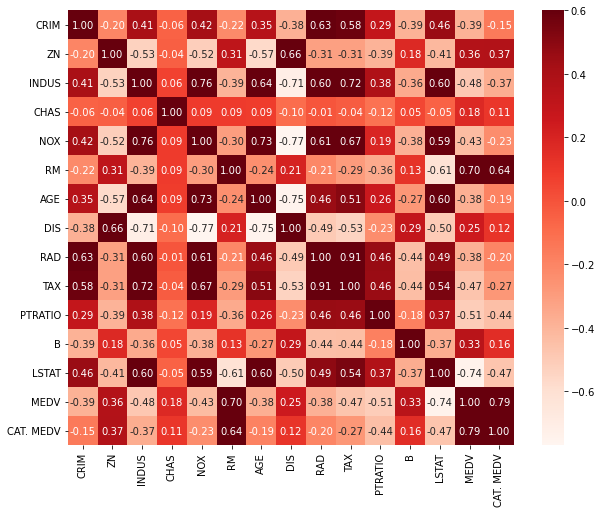

In [17]:
plt.subplots(figsize=(10,8))
sns.heatmap(corr_map, vmax=0.6, annot=True, square=False, fmt='.2f', cmap='Reds')

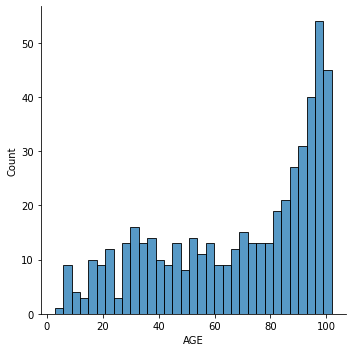

In [37]:
data=df['AGE']
sns.displot(data, binwidth=3)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


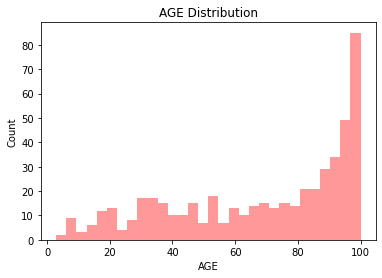

In [47]:
hist_kde= sns.distplot(df['AGE'],kde=False,bins=30, color='red')
hist_kde.set_title('AGE Distribution')
hist_kde.set_xlabel('AGE')
hist_kde.set_ylabel('Count')
plt.show()

# Observation:

The count of different age value present in the dataset and infer that most of the ages are between 
 80 and 100.

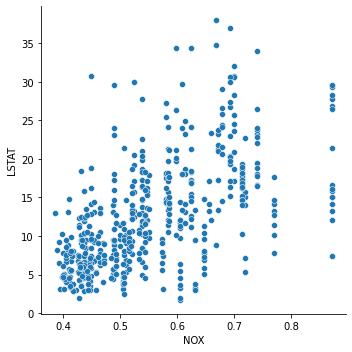

In [42]:
sns.relplot(x='NOX',y='LSTAT', data=df)

# Bivariate Analysis

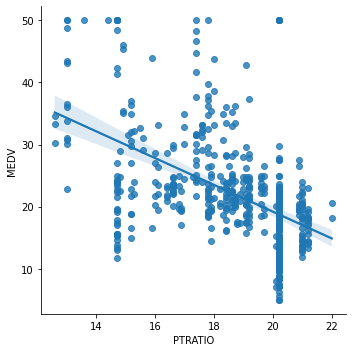

In [48]:
sns.lmplot(x='PTRATIO',y='MEDV', data=df)

# Observation:
 The lineplot graph with regression between PTRATIO and MEDV shows negative relationship

# Univariate Analysis

<AxesSubplot:xlabel='CAT. MEDV', ylabel='count'>

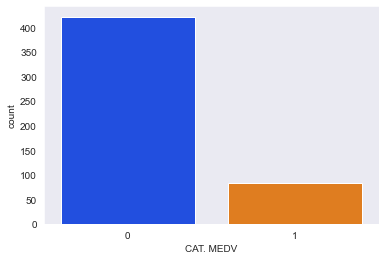

In [107]:
sns.set_style('dark')
sns.countplot(x='CAT. MEDV',data=df,palette='bright')

# Observation:
 The count for CAT.MEDV value 0 is greater than value 1.

# Multivariate Analysis

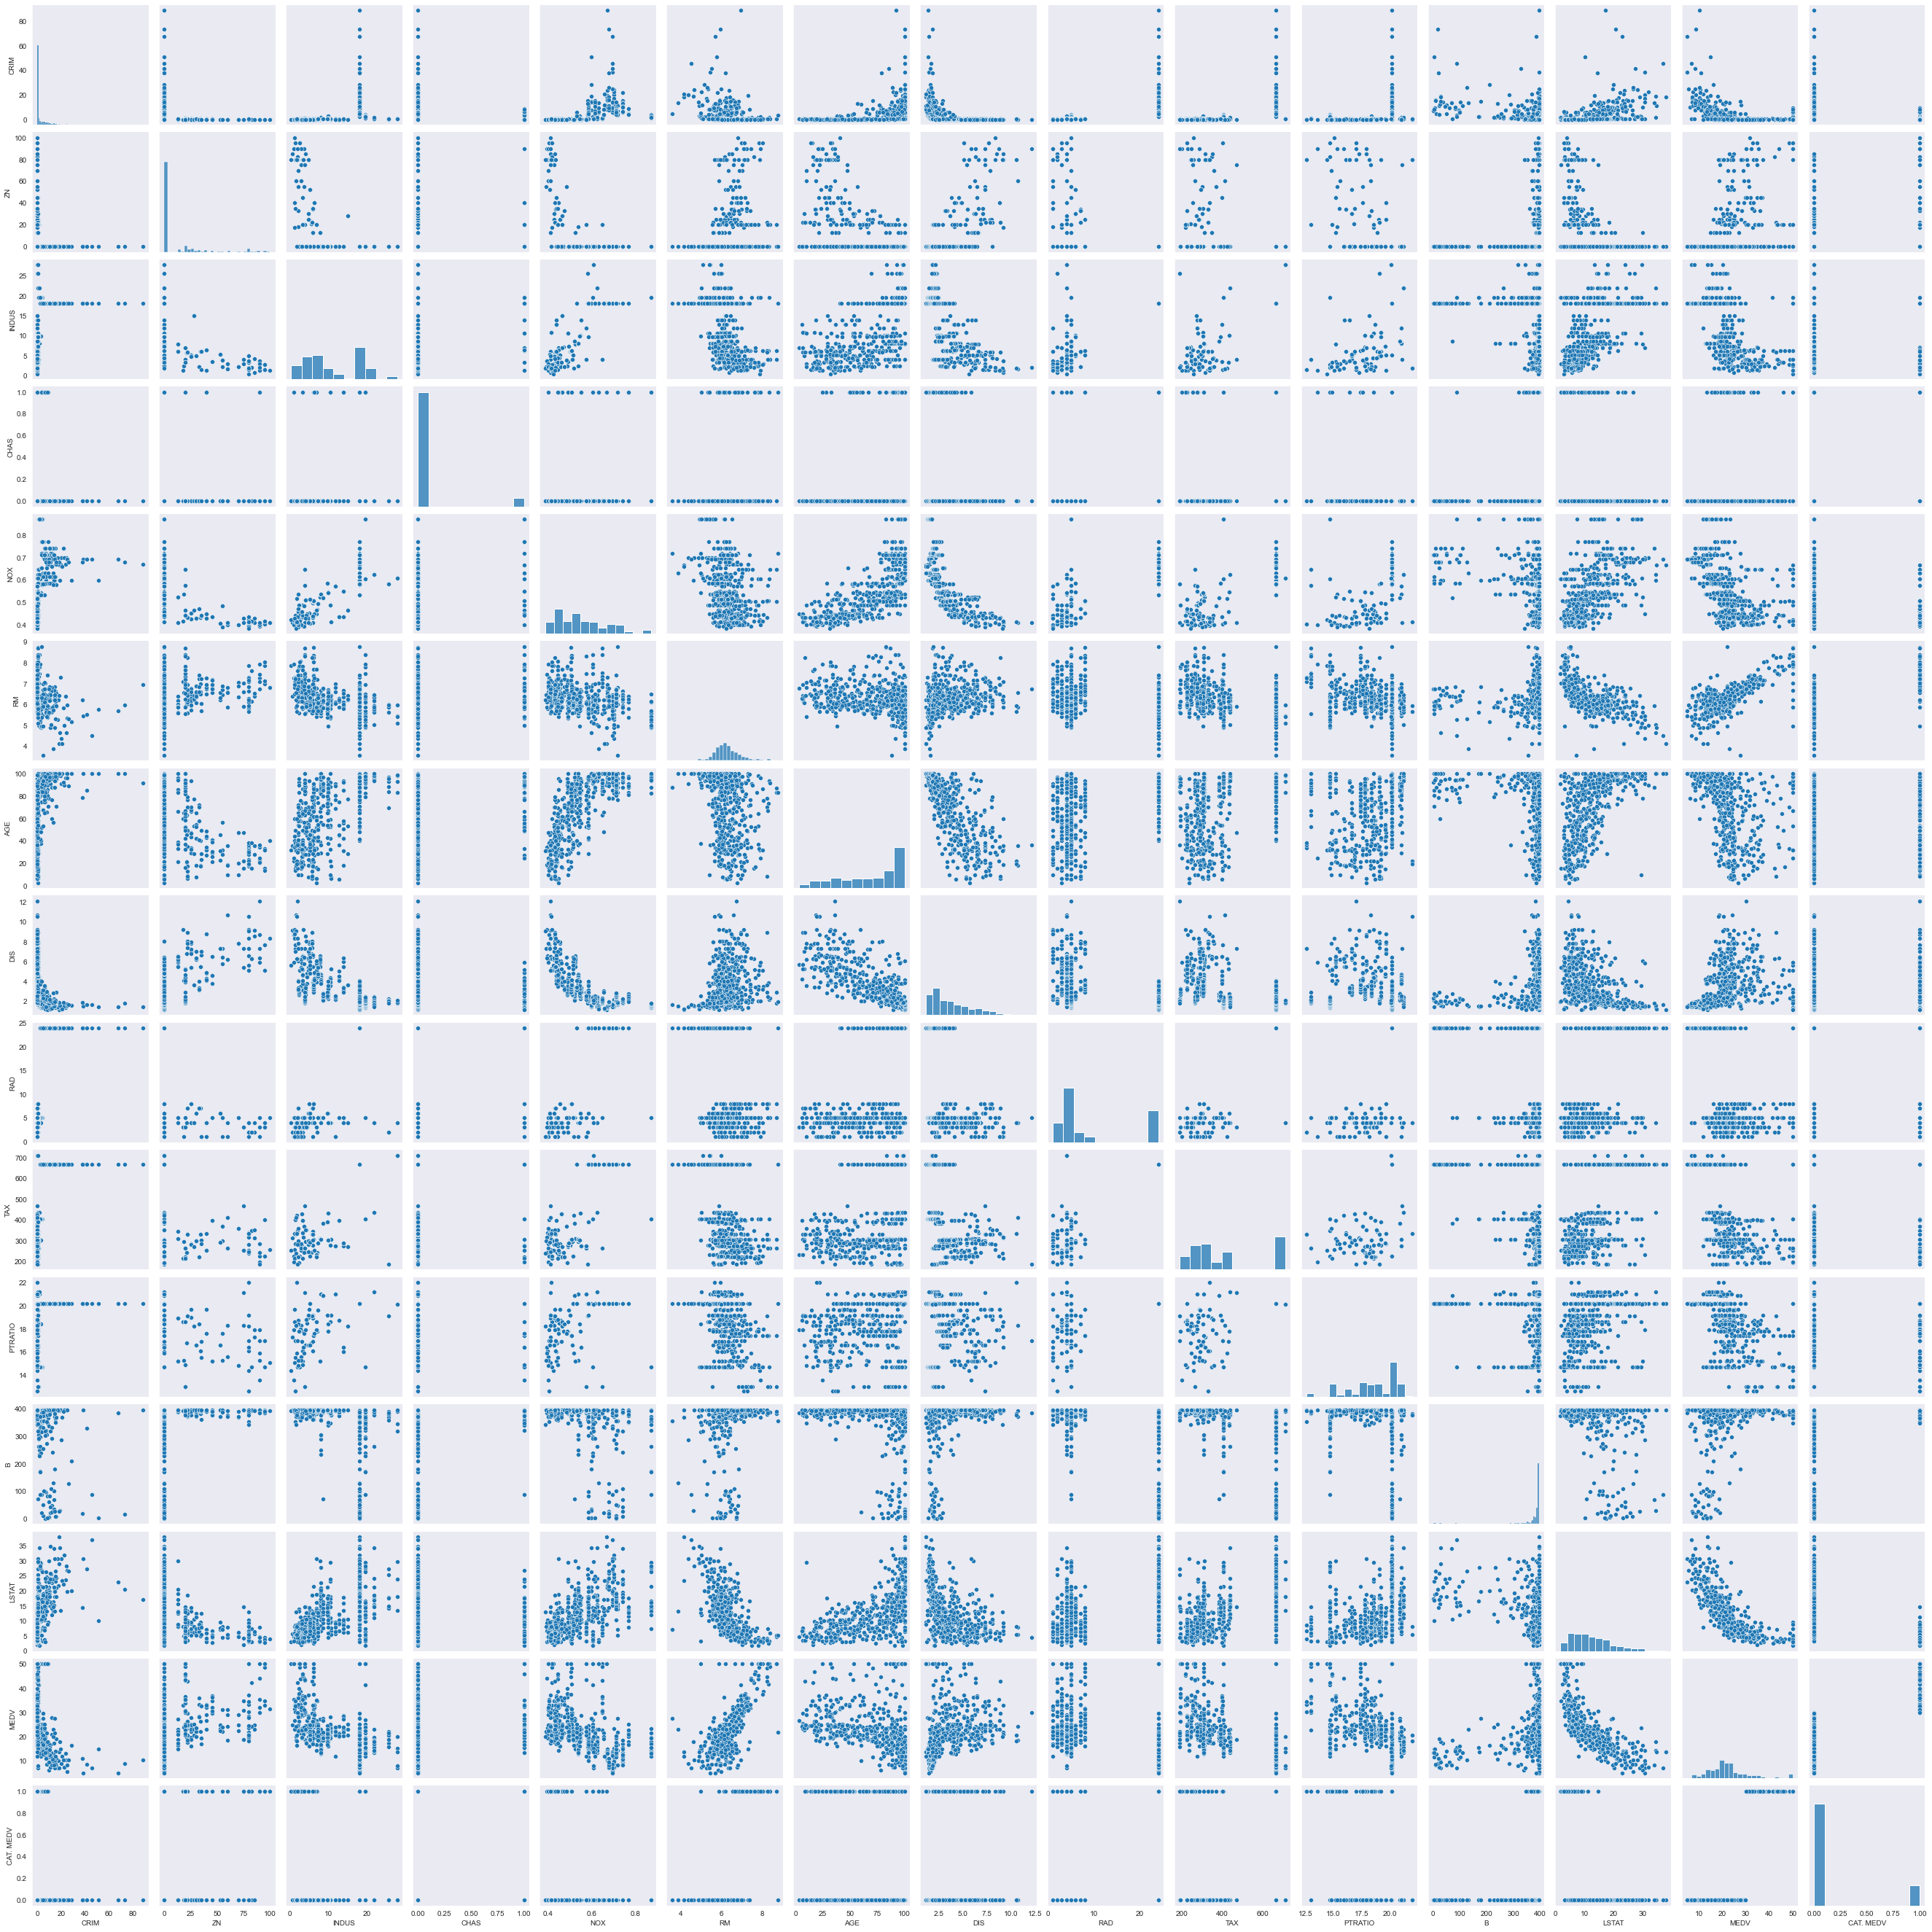

In [126]:
sns.pairplot(df)

# Observation
 1.Each variable is plotted against the rest of the variable.

2.Diagonal plots are the distributions of each variable.

3.diag_kind='kde' is used to make density plots for the diagonals

# LINEAR REGRESSION

In [110]:
x=df['TAX']

In [111]:
x.shape

(506,)

In [112]:
x=df.iloc[:][['TAX']]

In [113]:
x.shape

(506, 1)

In [114]:
y=df['RAD']

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3)

In [117]:
x_train.shape

(354, 1)

In [118]:
y_train.shape

(354,)

In [119]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [120]:
model1.predict([[0]])

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-9.77742528])

In [121]:
model1.intercept_

-9.77742527945614

In [122]:
y_predicted=model1.predict(x_test)
y_predicted

array([ 3.75805905, -0.57901516,  9.42961762, 21.96423867,  5.23552388,
       -0.57901516, 21.96423867,  9.42961762, 11.05006293,  9.19131684,
       -0.81731594, 21.96423867,  4.85424264,  9.81089887,  5.04488326,
       21.96423867,  4.85424264, 10.71644183, 21.96423867, 21.96423867,
       21.96423867,  1.99463327,  9.42961762,  6.66532857,  9.42961762,
        9.19131684,  2.80485592,  4.85424264,  5.90276607,  3.23379733,
        2.80485592, 24.10894569, 21.96423867,  6.14106685, 21.96423867,
       21.96423867,  6.80830904, 10.81176215, 21.96423867,  6.9512895 ,
       21.96423867,  0.89844968,  0.99376999,  3.90103951,  4.71126217,
       21.96423867, 10.81176215,  3.90103951,  1.32739109,  3.8057192 ,
        2.42357468,  9.42961762,  1.32739109,  1.80399265, 11.05006293,
        6.99894966,  3.23379733,  0.89844968, 21.96423867, 21.96423867,
       10.81176215,  9.19131684, 21.96423867,  0.80312937, 21.96423867,
       21.96423867, 21.96423867,  1.8516528 ,  5.04488326,  4.52

In [123]:
model1.score(x_test, y_test) #accuracy

0.7815119974696839

<AxesSubplot:>

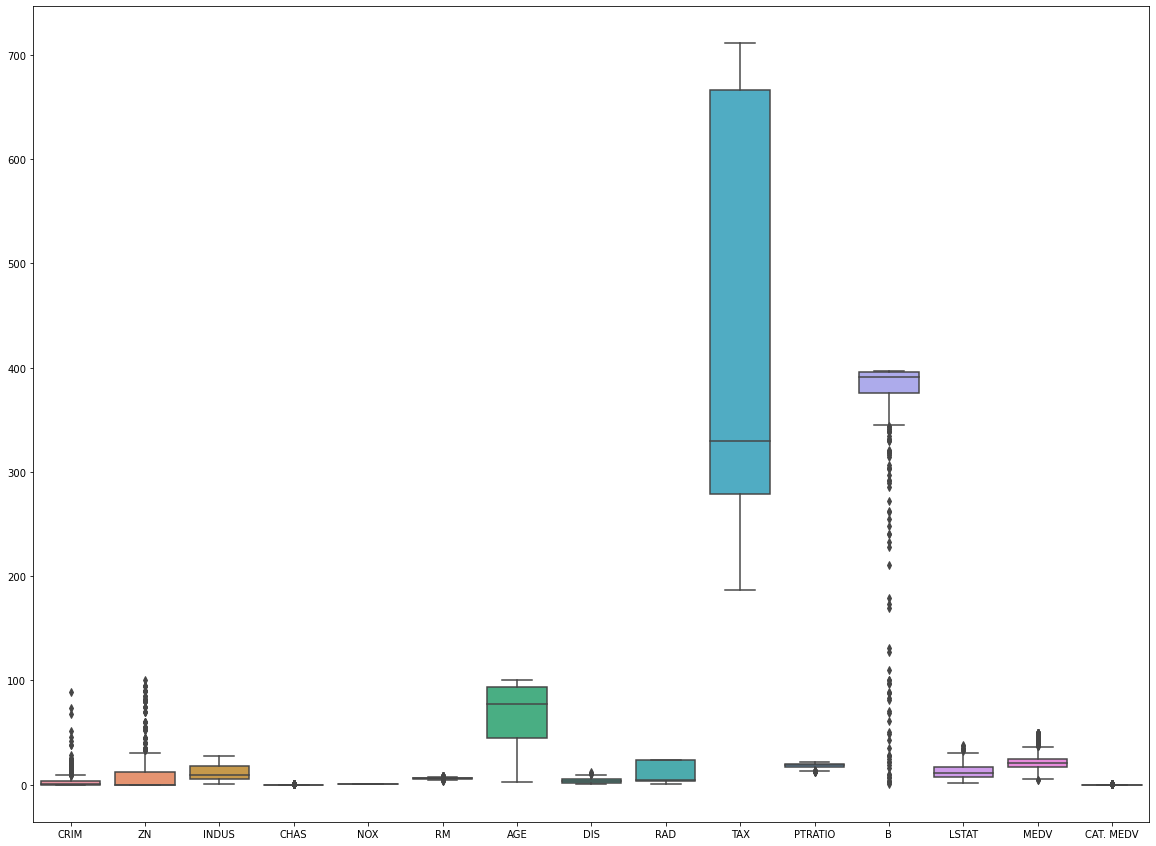

In [50]:
plt.subplots(figsize=(20,15))
sns.boxplot(data=df)

# Observation:
 INDUS, NOX, AGE, RAD, TAX not have outliers

# Removing Outliers

REMOVING OUTLIERS OF CRIM

<AxesSubplot:>

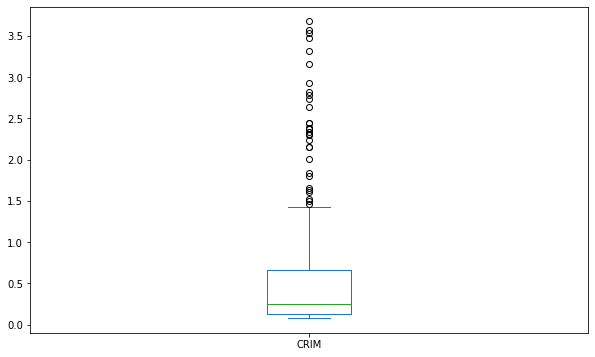

In [29]:
plt.figure(figsize=(10,6))
df.CRIM.plot(kind='box')

In [30]:
df['CRIM'].describe()

count    252.000000
mean       0.608986
std        0.780035
min        0.082210
25%        0.136283
50%        0.256510
75%        0.665610
max        3.673670
Name: CRIM, dtype: float64

In [35]:
df.drop(df[df['CRIM']>0.665610].index, axis=0, inplace=True)

In [36]:
df.drop(df[df['CRIM']<0.136283].index, axis=0, inplace=True)

In [37]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,0,NaN,NaN
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,0,NaN,NaN
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,0,NaN,NaN
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0,0,NaN,NaN
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7,0,NaN,NaN
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3,0,NaN,NaN
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2,0,NaN,NaN
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5,0,NaN,NaN


<AxesSubplot:>

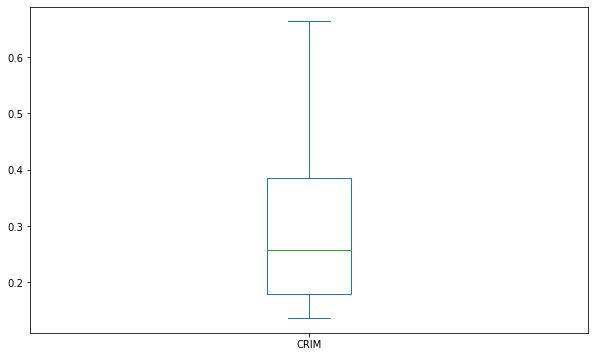

In [38]:
plt.figure(figsize=(10,6))
df.CRIM.plot(kind='box')

REMOVING OUTLIERS OF ZN

<AxesSubplot:>

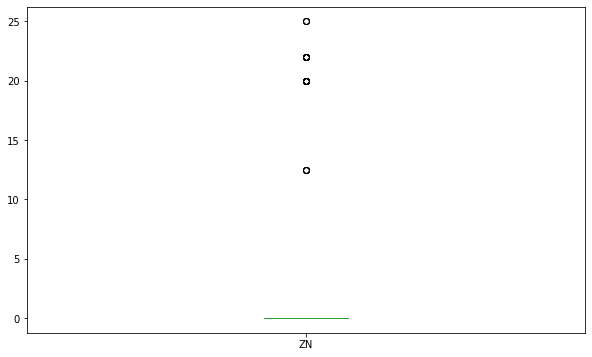

In [39]:
plt.figure(figsize=(10,6))
df.ZN.plot(kind='box')

In [40]:
df['ZN'].describe()

count    126.000000
mean       4.626984
std        8.652615
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       25.000000
Name: ZN, dtype: float64

In [41]:
df.drop(df[df['ZN']>0.000000].index, axis=0, inplace=True)

In [43]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4,0,NaN,NaN
14,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2,0,NaN,NaN
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9,0,NaN,NaN
38,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279,19.2,393.43,10.13,24.7,0,NaN,NaN
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7,0,NaN,NaN
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3,0,NaN,NaN
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2,0,NaN,NaN
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5,0,NaN,NaN


<AxesSubplot:>

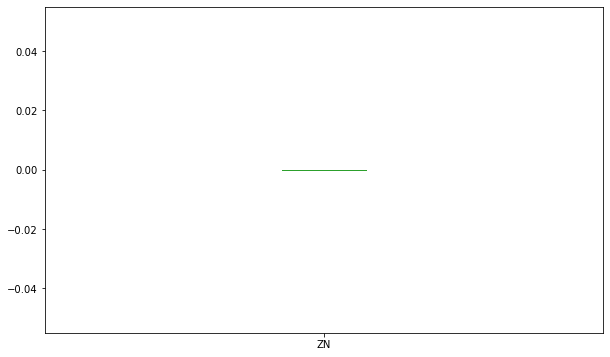

In [44]:
plt.figure(figsize=(10,6))
df.ZN.plot(kind='box')

REMOVING OUTLIERS OF CHAS

<AxesSubplot:>

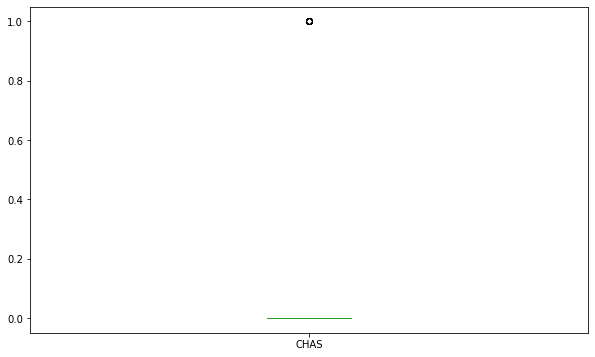

In [45]:
plt.figure(figsize=(10,6))
df.CHAS.plot(kind='box')

In [46]:
df['CHAS'].describe()

count    97.000000
mean      0.092784
std       0.291636
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: CHAS, dtype: float64

In [47]:
df.drop(df[df['CHAS']>0.000000].index, axis=0, inplace=True)

In [49]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4,0,NaN,NaN
14,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2,0,NaN,NaN
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9,0,NaN,NaN
38,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279,19.2,393.43,10.13,24.7,0,NaN,NaN
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7,0,NaN,NaN
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3,0,NaN,NaN
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2,0,NaN,NaN
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5,0,NaN,NaN


<AxesSubplot:>

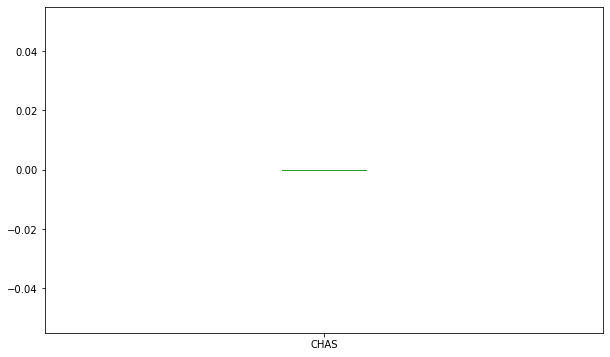

In [50]:
plt.figure(figsize=(10,6))
df.CHAS.plot(kind='box')

REMOVING OUTLIERS OF RM

<AxesSubplot:>

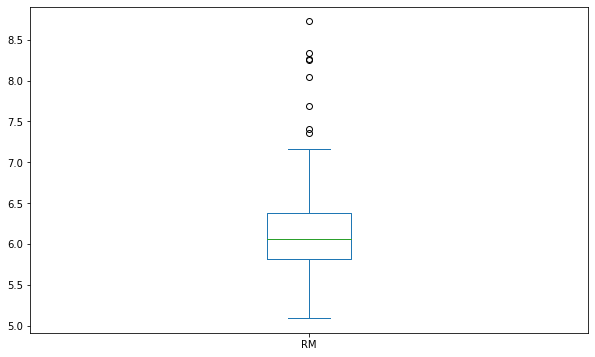

In [51]:
plt.figure(figsize=(10,6))
df.RM.plot(kind='box')

In [52]:
df['RM'].describe()

count    88.000000
mean      6.211557
std       0.679812
min       5.093000
25%       5.815000
50%       6.062000
75%       6.377500
max       8.725000
Name: RM, dtype: float64

In [53]:
df.drop(df[df['RM']>6.377500].index, axis=0, inplace=True)

In [54]:
df.drop(df[df['RM']<5.815000].index, axis=0, inplace=True)

In [55]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4,0,NaN,NaN
14,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2,0,NaN,NaN
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9,0,NaN,NaN
38,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279,19.2,393.43,10.13,24.7,0,NaN,NaN
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3,0,NaN,NaN
43,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44,24.7,0,NaN,NaN
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80,16.6,0,NaN,NaN
71,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7,0,NaN,NaN
73,0.19539,0.0,10.81,0,0.413,6.245,6.2,5.2873,4,305,19.2,377.17,7.54,23.4,0,NaN,NaN
103,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3,0,NaN,NaN


<AxesSubplot:>

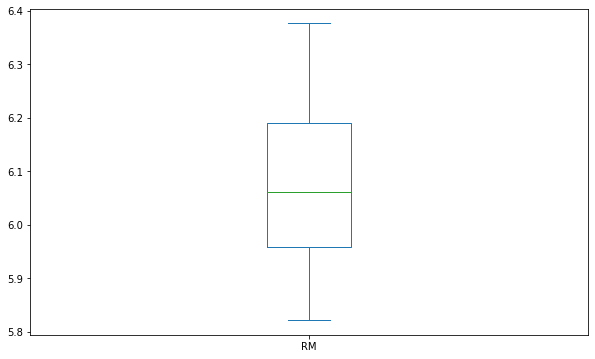

In [56]:
plt.figure(figsize=(10,6))
df.RM.plot(kind='box')

REMOVING OUTLIERS OF B

<AxesSubplot:>

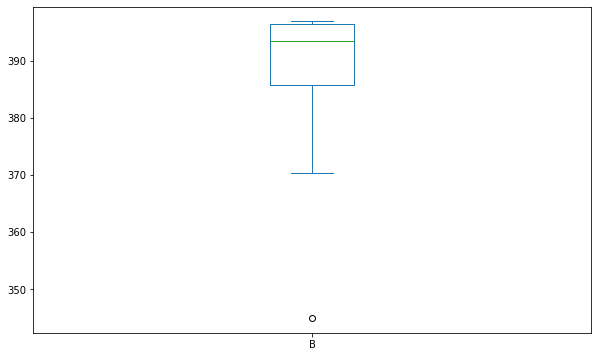

In [59]:
plt.figure(figsize=(10,6))
df.B.plot(kind='box')

In [65]:
df['B'].describe()

count     22.000000
mean     392.918636
std        2.939022
min      385.810000
25%      391.432500
50%      393.530000
75%      394.820000
max      396.300000
Name: B, dtype: float64

In [66]:
df.drop(df[df['B']>394.820000].index, axis=0, inplace=True)

In [67]:
df.drop(df[df['B']<391.432500].index, axis=0, inplace=True)

In [68]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
38,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279,19.2,393.43,10.13,24.7,0,NaN,NaN
43,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44,24.7,0,NaN,NaN
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80,16.6,0,NaN,NaN
103,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3,0,NaN,NaN
104,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384,20.9,392.69,12.33,20.1,0,NaN,NaN
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30,19.2,0,NaN,NaN
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437,21.2,394.67,16.96,18.1,0,NaN,NaN
138,0.24980,0.0,21.89,0,0.624,5.857,98.2,1.6686,4,437,21.2,392.04,21.32,13.3,0,NaN,NaN
215,0.19802,0.0,10.59,0,0.489,6.182,42.4,3.9454,4,277,18.6,393.63,9.47,25.0,0,NaN,NaN
313,0.26938,0.0,9.90,0,0.544,6.266,82.8,3.2628,4,304,18.4,393.39,7.90,21.6,0,NaN,NaN


<AxesSubplot:>

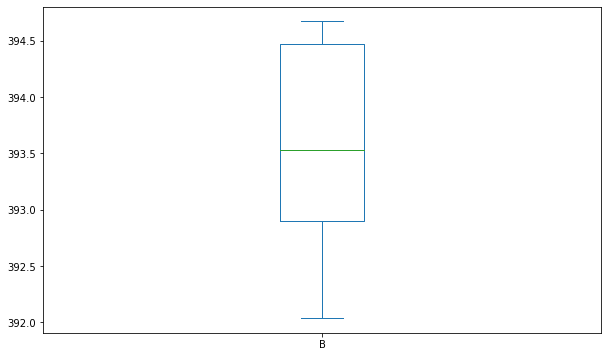

In [69]:
plt.figure(figsize=(10,6))
df.B.plot(kind='box')

# Random Forest

In [7]:
feature_space=df.iloc[:,df.columns!='TAX']
feature_class=df.iloc[:,df.columns=='TAX']
training_set, test_set, class_set, test_class_set=train_test_split(feature_space, feature_class, test_size=0.2, random_state=43)

In [8]:
class_set=class_set.values.ravel()
test_class_set=test_class_set.values.ravel()

In [9]:
fit_rf=RandomForestClassifier(random_state=43)

In [183]:
np.random.seed(43)
start=datetime.now()

param_dist={'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}
cv_rf=GridSearchCV(fit_rf,cv=10, param_grid=param_dist, n_jobs=3)
cv_rf.fit(training_set, class_set)
print('The best parameter using Grid search is ',cv_rf.best_params_)
end=datetime.now()
print('Time require for grid search is ',(end-start))

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


The best parameter using Grid search is  {'n_estimators': 300}
Time require for grid search is  0:01:14.573599


In [184]:
pred=cv_rf.predict(test_set)
print("Random forest accuracy is",accuracy_score(test_class_set,pred)*100)

Random forest accuracy is 90.19607843137256


# DECISION TREE

In [163]:
x=df.drop('RAD',axis=1).values

In [164]:
y=df['RAD'].values

In [165]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [166]:
model_dt_2=DecisionTreeClassifier(random_state=1, max_depth=2)

model_dt_2.fit(x_train, y_train)
model_dt_2_score_train=model_dt_2.score(x_train, y_train)

model_dt_2_score_test=model_dt_2.score(x_test, y_test)
print('Training score',model_dt_2_score_train)
print('Testing score',model_dt_2_score_test)

Training score 0.5915841584158416
Testing score 0.5784313725490197


In [167]:
model_dt_4=DecisionTreeClassifier(random_state=1, max_depth=4)

model_dt_4.fit(x_train, y_train)
model_dt_4_score_train=model_dt_4.score(x_train, y_train)

model_dt_4_score_test=model_dt_4.score(x_test, y_test)
print('Training score',model_dt_4_score_train)
print('Testing score',model_dt_4_score_test)

Training score 0.6905940594059405
Testing score 0.6372549019607843


In [168]:
model_dt_6=DecisionTreeClassifier(random_state=1, max_depth=6)

model_dt_6.fit(x_train, y_train)
model_dt_6_score_train=model_dt_6.score(x_train, y_train)

model_dt_6_score_test=model_dt_6.score(x_test, y_test)
print('Training score',model_dt_6_score_train)
print('Testing score',model_dt_6_score_test)

Training score 0.806930693069307
Testing score 0.7352941176470589


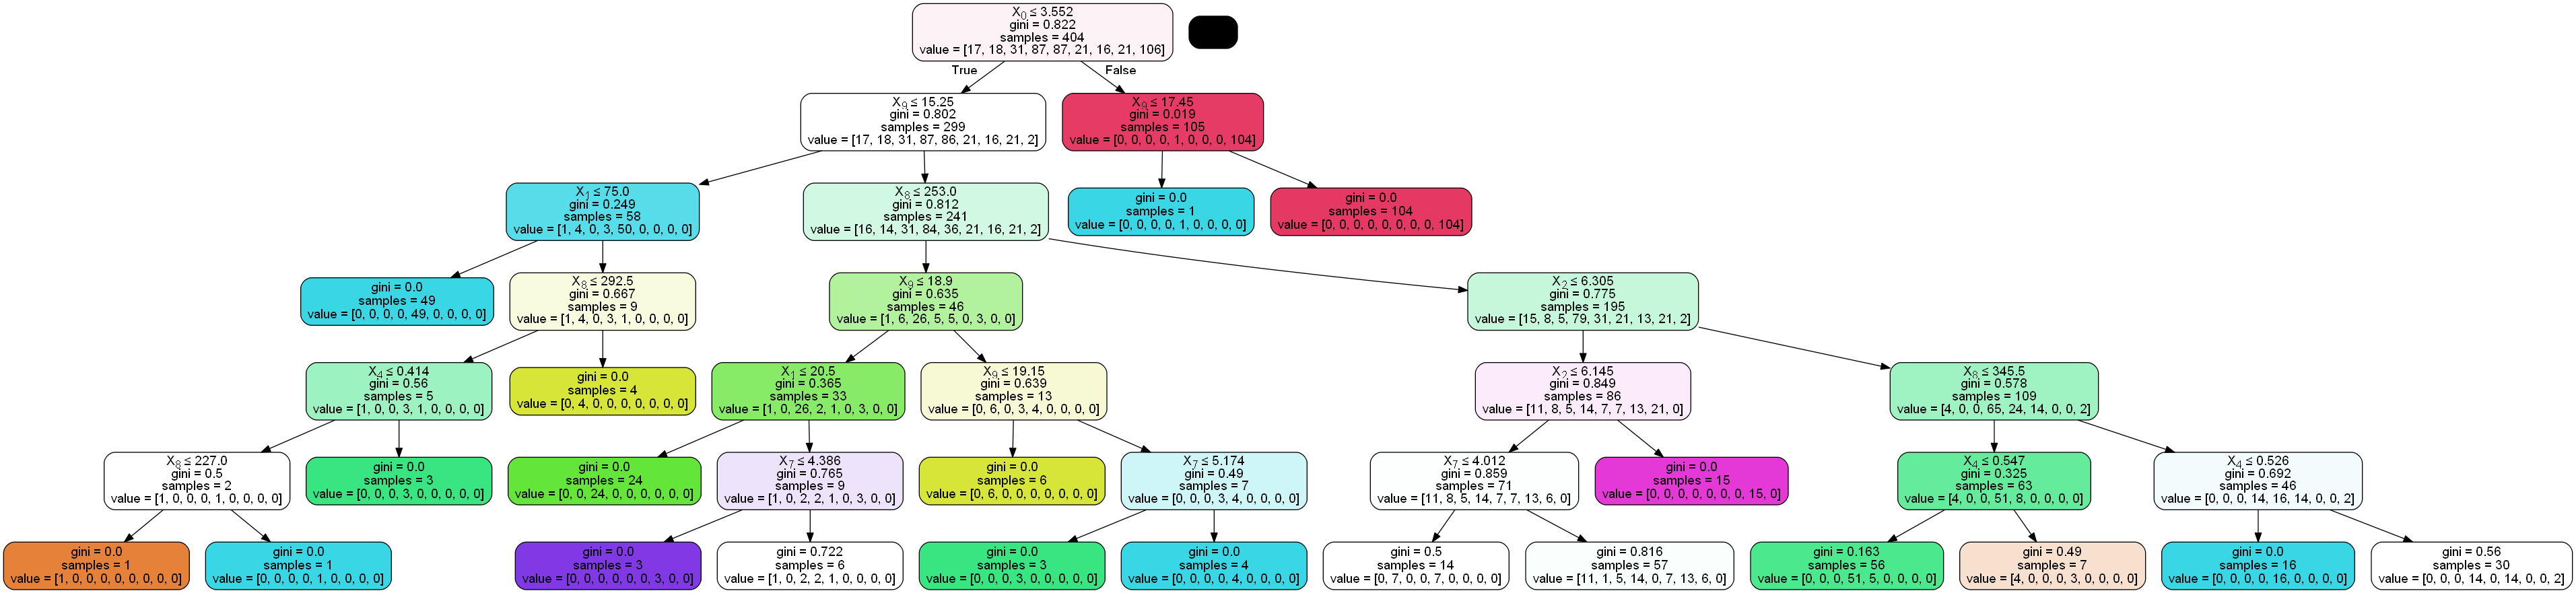

<Figure size 720x1440 with 0 Axes>

In [169]:
plt.figure(figsize=(10,20))
dot_data=StringIO()
export_graphviz(model_dt_6, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())